In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Import data**

In [2]:
df = pd.read_csv('/content/Indian-Resturants.csv')

 **Data Overview:**

 Explore the basic characteristics of the dataset, including dimensions, data
 types, and missing values.

In [3]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34.0,Khandari,27.211450,78.002381,...,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,154.0,0.0,-1.0,-1.0
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34.0,Agra Cantt,27.160569,78.011583,...,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203.0,161.0,0.0,-1.0,-1.0
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34.0,Shahganj,27.182938,77.979684,...,1.0,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801.0,107.0,0.0,1.0,-1.0
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34.0,Civil Lines,27.205668,78.004799,...,1.0,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693.0,157.0,0.0,1.0,-1.0
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34.0,Tajganj,27.157709,78.052421,...,3.0,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470.0,291.0,0.0,1.0,-1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113160 entries, 0 to 113159
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                113160 non-null  int64  
 1   name                  113160 non-null  object 
 2   establishment         113160 non-null  object 
 3   url                   113159 non-null  object 
 4   address               113031 non-null  object 
 5   city                  113159 non-null  object 
 6   city_id               113159 non-null  float64
 7   locality              113159 non-null  object 
 8   latitude              113159 non-null  float64
 9   longitude             113159 non-null  float64
 10  zipcode               28619 non-null   object 
 11  country_id            113159 non-null  float64
 12  locality_verbose      113159 non-null  object 
 13  cuisines              112134 non-null  object 
 14  timings               111046 non-null  object 
 15  

In [5]:
# check missing value and handle them
print((df.isnull().sum()/df.shape[0])*100)
df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True)
df.dropna(inplace=True)

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000884
address                  0.113998
city                     0.000884
city_id                  0.000884
locality                 0.000884
latitude                 0.000884
longitude                0.000884
zipcode                 74.709261
country_id               0.000884
locality_verbose         0.000884
cuisines                 0.906681
timings                  1.868151
average_cost_for_two     0.000884
price_range              0.000884
currency                 0.000884
highlights               0.000884
aggregate_rating         0.000884
rating_text              0.000884
votes                    0.000884
photo_count              0.000884
opentable_support        0.005302
delivery                 0.000884
takeaway                 0.000884
dtype: float64


<ipython-input-5-ca083c455066>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True)


<Axes: >

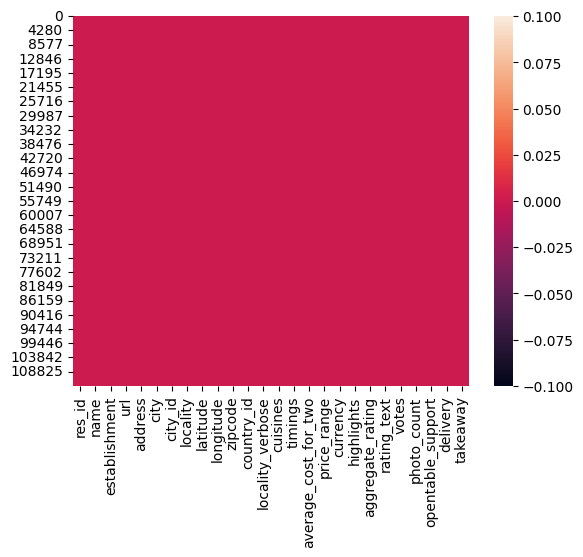

In [6]:
sns.heatmap(df.isnull())

In [7]:
# describe data
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,1.103360e+05,110336.000000,110336.000000,110336.000000,110336.0,110336.00000,110336.000000,110336.000000,110336.000000,110336.000000,110336.0,110336.000000,110336.0
mean,1.246773e+07,4059.212515,22.178683,77.999130,1.0,629.00629,1.909205,3.506564,440.986632,274.926932,0.0,-0.207620,-1.0
std,8.369504e+06,5418.609352,6.933728,7.036405,0.0,634.35276,0.914966,1.198251,1090.664972,808.282088,0.0,0.976378,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.00000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,2.400052e+06,9.000000,15.566639,75.805641,1.0,250.00000,1.000000,3.400000,23.000000,4.000000,0.0,-1.000000,-1.0
50%,1.867473e+07,24.000000,23.164855,77.600327,1.0,450.00000,2.000000,3.900000,131.000000,25.000000,0.0,-1.000000,-1.0
75%,1.881658e+07,11306.000000,27.040680,80.227629,1.0,750.00000,2.000000,4.200000,434.000000,180.000000,0.0,1.000000,-1.0
max,1.915935e+07,11354.000000,75.791315,91.832769,1.0,15000.00000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


 **Basic Statistics:**

Average rating of restaurants: 3.506564493909513


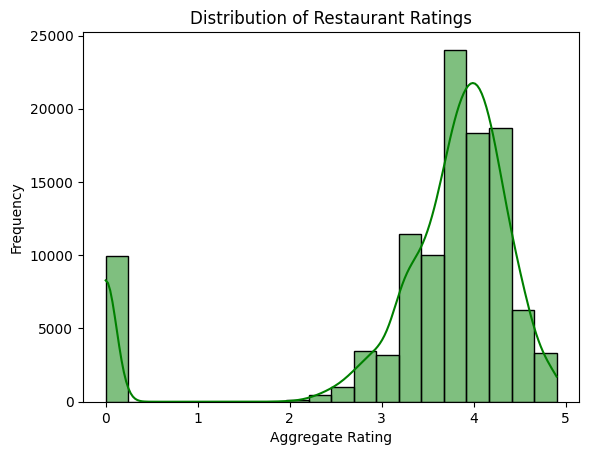

In [8]:
#  Calculate and visualize the average rating of restaurants.
# Analyze the distribution of restaurant ratings to understand the overall rating landscape.
Avg_rating = df['aggregate_rating'].mean()
print('Average rating of restaurants:', Avg_rating)
sns.histplot(df['aggregate_rating'], kde=True, bins=20, color='green')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

 **Location Analysis:**


city
Agra             3.510274
Ahmedabad        3.815706
Ajmer            3.581988
Alappuzha        0.858842
Allahabad        3.495074
Amravati         2.595097
Amritsar         3.586408
Aurangabad       3.526499
Bangalore        4.073616
Bhopal           3.537075
Bhubaneshwar     3.696508
Chandigarh       3.927081
Chennai          3.973938
Coimbatore       3.550959
Cuttack          3.375446
Darjeeling       1.234922
Dehradun         3.554375
Dharamshala      2.657401
Faridabad        3.327419
Gandhinagar      3.155921
Gangtok          1.878052
Ghaziabad        3.609091
Goa              3.643911
Gorakhpur        3.364462
Greater Noida    3.151515
Guntur           3.471093
Gurgaon          4.048837
Guwahati         3.717701
Gwalior          3.553149
Haridwar         2.986248
Hyderabad        4.043514
Indore           3.749476
Jabalpur         3.523100
Jaipur           3.851294
Jalandhar        3.565025
Jammu            3.546714
Jamnagar         3.092962
Jamshedpur       3.396099
Jhansi 

<ipython-input-9-f1a0fd779c0d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_rating.head(5).index, y=city_rating.head(5).values, palette='viridis')


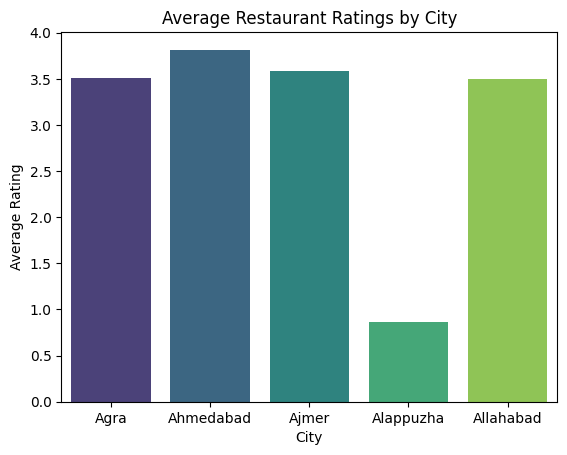

In [9]:
#Identify the city with the highest concentration of restaurants.
#Visualize the distribution of restaurant ratings across different cities.
city_rating = df.groupby('city')['aggregate_rating'].mean()
print(city_rating)
sns.barplot(x=city_rating.head(5).index, y=city_rating.head(5).values, palette='viridis')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Restaurant Ratings by City')
plt.show()

**Cuisine Analysis:**


cuisines
North Indian             9028
North Indian, Chinese    3706
Fast Food                3068
Cafe                     2383
Pizza, Fast Food         2197
Name: name, dtype: int64
                  num_cuisines  aggregate_rating
num_cuisines          1.000000          0.224167
aggregate_rating      0.224167          1.000000


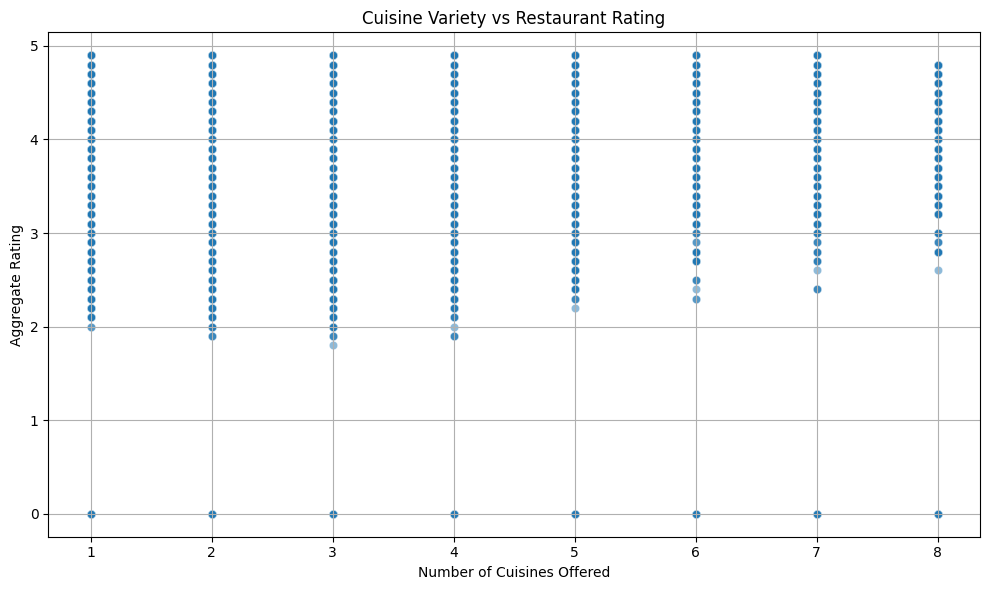

In [10]:
# Determine the most popular cuisines among the listed restaurants.
populer_cuisines = df.groupby('cuisines')['name'].count().sort_values(ascending=False).head(5)
print(populer_cuisines)
# Investigate if there's a correlation between the variety of cuisines offered and restaurant rating
# Create a new column: number of cuisines offered by each restaurant
df['num_cuisines'] = df['cuisines'].dropna().apply(lambda x: len(x.split(', ')))
correlation = df[['num_cuisines', 'aggregate_rating']].corr()
print(correlation)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_cuisines', y='aggregate_rating', alpha=0.5)

plt.title('Cuisine Variety vs Restaurant Rating')
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

**Price Range and Rating:**

                  price_range  aggregate_rating
price_range          1.000000          0.257046
aggregate_rating     0.257046          1.000000
price_range
1.0     229.962337
2.0     529.922077
3.0    1122.677137
4.0    2245.760902
Name: average_cost_for_two, dtype: float64


<ipython-input-11-96c132146c2c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_cost.index, y=price_cost.values, palette='viridis')


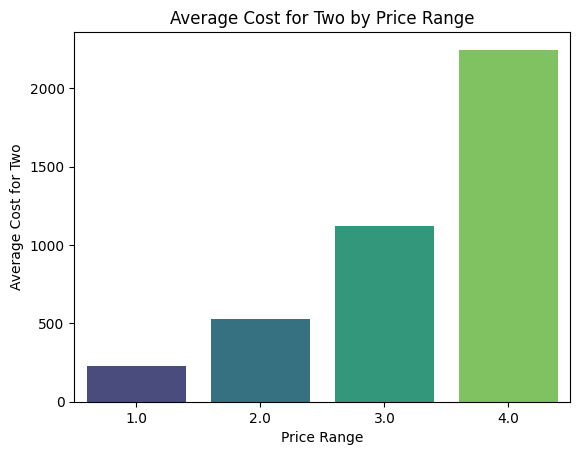

In [11]:
#  Analyze the relationship between price range and restaurant ratings.
correlation = df[['price_range', 'aggregate_rating']].corr()
print(correlation)

# Visualize the average cost for two people in different price categories.
price_cost = df.groupby('price_range')['average_cost_for_two'].mean()
print(price_cost)
sns.barplot(x=price_cost.index, y=price_cost.values, palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two by Price Range')
plt.show()


**Online Order and Table Booking:**

delivery
-1.0    3.324581
 0.0    3.406818
 1.0    3.785256
Name: aggregate_rating, dtype: float64


<ipython-input-12-0160d657f361>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='delivery', y='aggregate_rating', palette='viridis')


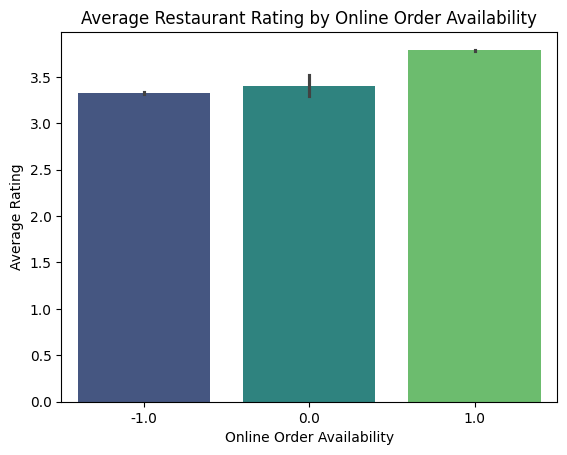

opentable_support
0.0    110336
Name: name, dtype: int64


In [12]:
#  Investigate the impact of online order availability on restaurant ratings.
order_rating = df.groupby('delivery')['aggregate_rating'].mean()
print(order_rating)
sns.barplot(data=df, x='delivery', y='aggregate_rating', palette='viridis')
plt.xlabel('Online Order Availability')
plt.ylabel('Average Rating')
plt.title('Average Restaurant Rating by Online Order Availability')
plt.show()

# Analyze the distribution of restaurants that offer table booking.
table_booking_counts = df.groupby('opentable_support')['name'].count()
print(table_booking_counts)

**Top Restaurant Chains:**

name
Domino's Pizza     1544
KFC                 652
Cafe Coffee Day     494
Pizza Hut           470
Subway              397
Name: count, dtype: int64


<ipython-input-13-ece7ebefb813>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains.index, y=top_chains.values, palette='viridis')


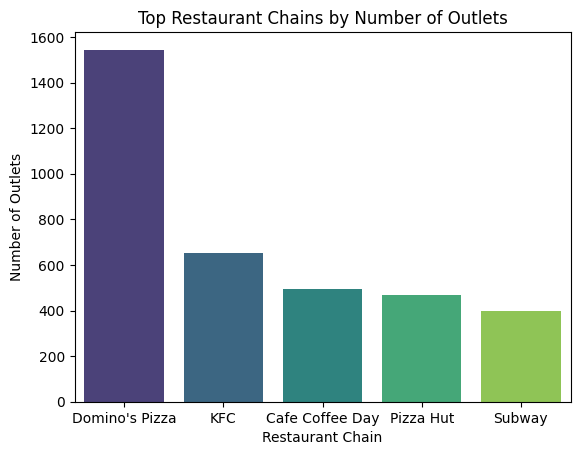

name
Cafe Coffee Day    2.844534
Domino's Pizza     3.675130
KFC                3.837577
Pizza Hut          3.741915
Subway             3.726196
Name: aggregate_rating, dtype: float64


In [13]:
#  Identify and visualize the top restaurant chains based on the number of outlets.
top_chains = df['name'].value_counts().head(5)
print(top_chains)
sns.barplot(x=top_chains.index, y=top_chains.values, palette='viridis')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.title('Top Restaurant Chains by Number of Outlets')
plt.show()
#  Explore the ratings of these top chains.
top_chain_ratings = df[df['name'].isin(top_chains.index)].groupby('name')['aggregate_rating'].mean()
print(top_chain_ratings)


**Restaurant Features:**

In [14]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'num_cuisines'],
      dtype='object')

<ipython-input-15-8f1713474ce2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='Set2')


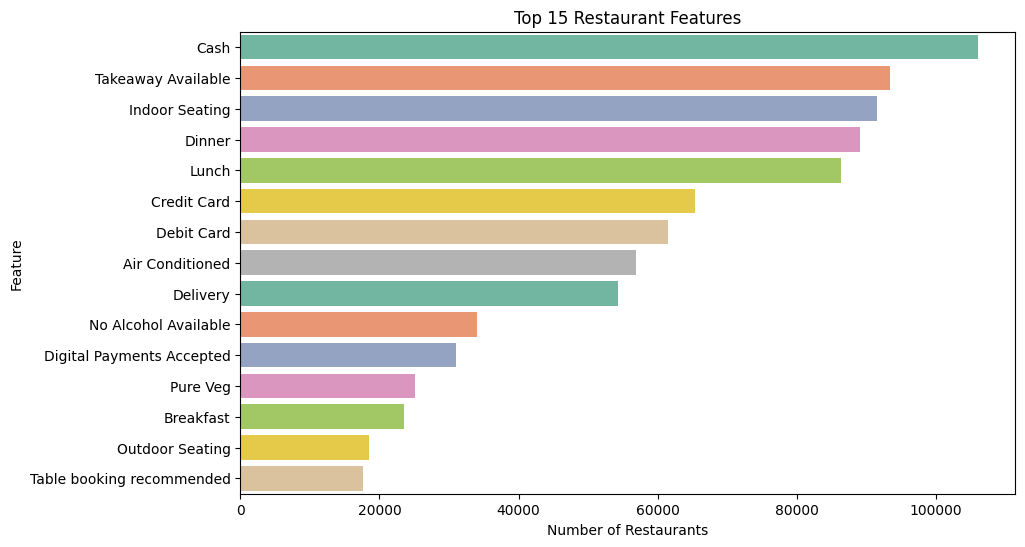

<Figure size 1200x600 with 0 Axes>

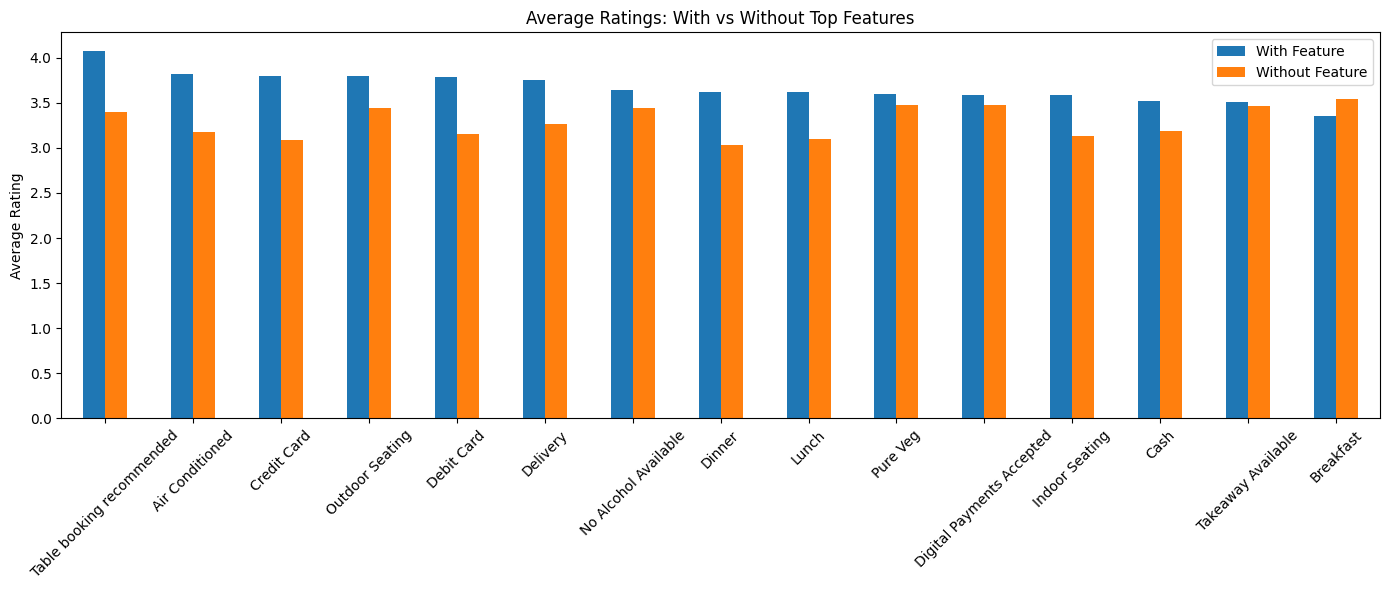

In [15]:
#  Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc.
# Convert highlights column to actual Python lists
import ast
df['highlights_list'] = df['highlights'].apply(ast.literal_eval)

# Flatten and count all features
from collections import Counter
feature_counter = Counter([feature for sublist in df['highlights_list'] for feature in sublist])

# Top 15 features
top_features = pd.Series(feature_counter).sort_values(ascending=False).head(15)

# Visualize top features
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Set2')
plt.title("Top 15 Restaurant Features")
plt.xlabel("Number of Restaurants")
plt.ylabel("Feature")
plt.show()

# Correlation of features with average rating
feature_rating_comparison = {}

for feature in top_features.index:
    with_feature = df[df['highlights_list'].apply(lambda x: feature in x)]['aggregate_rating']
    without_feature = df[df['highlights_list'].apply(lambda x: feature not in x)]['aggregate_rating']
    feature_rating_comparison[feature] = {
        'With Feature': with_feature.mean(),
        'Without Feature': without_feature.mean()
    }

# Create DataFrame
rating_df = pd.DataFrame(feature_rating_comparison).T
rating_df = rating_df.sort_values(by='With Feature', ascending=False)

# Plot comparison
plt.figure(figsize=(12, 6))
rating_df.plot(kind='bar', figsize=(14, 6))
plt.title("Average Ratings: With vs Without Top Features")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 **Word Cloud for Reviews:**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


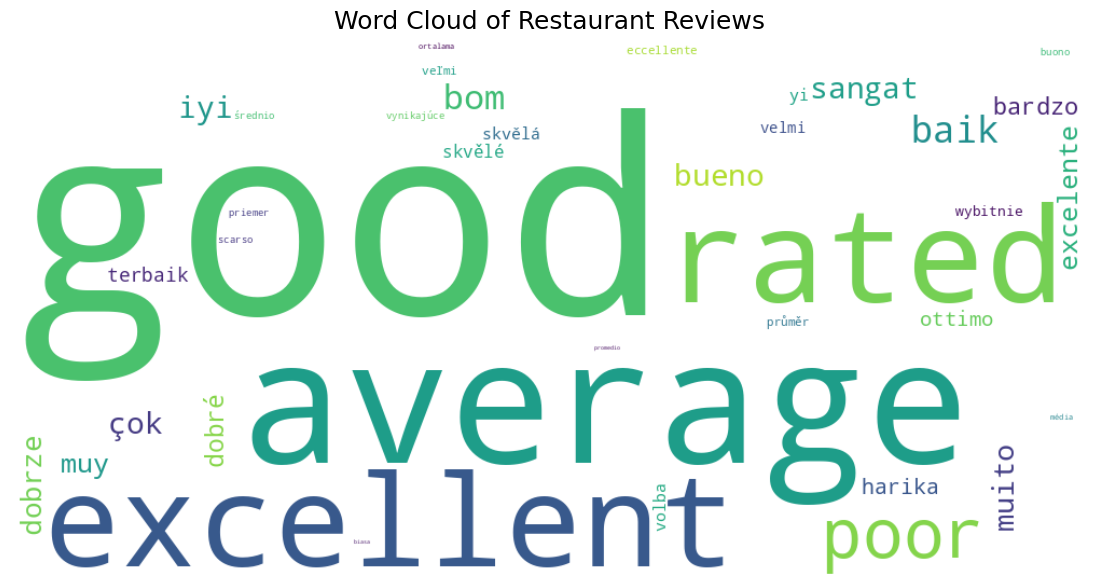

In [16]:
#  Create a word cloud based on customer reviews to identify common positive and negative sentiments.
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Example column name: replace with actual review column
review_column = 'rating_text'  # Replace this if you have actual review text

# Combine all reviews into one text
text_data = ' '.join(df[review_column].dropna().astype(str).tolist()).lower()

# Clean the text
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=stopwords, collocations=False).generate(text_data)

# Show the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Restaurant Reviews", fontsize=18)
plt.show()